Exploratory Data Analysis of the Time Series Datasets and Feature Engineering and Selection on DJI Data

Reference: https://www.kaggle.com/code/andreshg/timeseries-analysis-a-complete-guide/notebook

In [ ]:
# !pip install colorama

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns # Visualization
import matplotlib.pyplot as plt # Visualization
# from colorama import Fore

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/mandalnilabja/soc2022/main/data/Processed_DJI.csv')
df.head()

,Date,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,...,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU
0,2009-12-31,10428.049805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.03,0.26,-1.08,-1.00,-0.11,-0.08,-0.06,-0.48,0.30,0.39
1,2010-01-04,10583.959961,NaN,0.014951,NaN,NaN,NaN,NaN,NaN,NaN,...,1.52,3.26,1.61,1.62,-0.57,-0.59,-0.42,3.12,3.91,2.10
2,2010-01-05,10572.019531,NaN,-0.001128,0.014951,NaN,NaN,NaN,NaN,NaN,...,-0.07,1.96,-0.20,0.31,0.43,0.03,0.12,-0.90,1.42,-0.12
3,2010-01-06,10573.679688,0.515598,0.000157,-0.001128,0.014951,NaN,NaN,NaN,NaN,...,0.56,2.15,-0.02,0.07,-0.56,-0.24,-0.17,2.62,2.25,1.77
4,2010-01-07,10606.860352,9.776045,0.003138,0.000157,-0.001128,0.014951,NaN,NaN,NaN,...,-0.72,0.94,0.50,0.40,0.58,0.58,0.54,-1.85,0.22,-0.58


In [12]:
from datetime import datetime, date 

df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')
df.head().style.set_properties(subset=['Date'], **{'background-color': 'dodgerblue'})

,Date,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,ROC_20,EMA_10,EMA_20,EMA_50,EMA_200,DTB4WK,DTB3,DTB6,DGS5,DGS10,Oil,Gold,DAAA,DBAA,GBP,JPY,CAD,CNY,AAPL,AMZN,GE,JNJ,JPM,MSFT,WFC,XOM,FCHI,FTSE,GDAXI,GSPC,HSI,IXIC,SSEC,RUT,NYSE,TE1,TE2,TE3,TE5,TE6,DE1,DE2,DE4,DE5,DE6,CTB3M,CTB6M,CTB1Y,Name,AUD,Brent,CAC-F,copper-F,WIT-oil,DAX-F,DJI-F,EUR,FTSE-F,gold-F,HSI-F,KOSPI-F,NASDAQ-F,GAS-F,Nikkei-F,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU
0,2009-12-31 00:00:00,10428.049805,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.040000,0.060000,0.200000,2.690000,3.850000,nan,nan,5.330000,6.390000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,3.810000,3.790000,3.650000,0.020000,0.160000,1.060000,2.540000,6.190000,6.330000,6.350000,nan,nan,nan,DJI,0.350000,-0.130000,0.150000,0.090000,0.100000,0.480000,-1.190000,-0.120000,0.270000,0.340000,1.680000,-0.070000,-0.960000,-2.400000,0.670000,0.030000,0.260000,-1.080000,-1.000000,-0.110000,-0.080000,-0.060000,-0.480000,0.300000,0.390000
1,2010-01-04 00:00:00,10583.959961,nan,0.014951,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.050000,0.080000,0.180000,2.650000,3.850000,0.026830,0.000000,5.350000,6.390000,-0.004222,-0.004467,-0.010644,-0.001991,0.015565,-0.004609,0.021150,0.004192,0.028318,0.015420,0.012227,0.014078,0.019724,nan,nan,0.016043,nan,0.017306,nan,0.023521,0.019733,3.800000,3.770000,3.670000,0.030000,0.130000,1.040000,2.540000,6.210000,6.310000,6.340000,-0.100000,-0.043860,-0.014870,DJI,1.730000,2.810000,1.990000,1.360000,2.710000,0.960000,1.280000,0.610000,1.740000,2.050000,-0.520000,0.540000,1.510000,5.600000,0.310000,1.520000,3.260000,1.610000,1.620000,-0.570000,-0.590000,-0.420000,3.120000,3.910000,2.100000
2,2010-01-05 00:00:00,10572.019531,nan,-0.001128,0.014951,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.030000,0.070000,0.170000,2.560000,3.770000,0.002699,0.001560,5.240000,6.300000,-0.007628,-0.009838,-0.001441,0.000015,0.001729,0.005900,0.005178,-0.011596,0.019370,0.000323,0.027452,0.003904,-0.000264,0.004036,-0.002718,0.003116,0.020909,0.000126,0.011844,-0.002515,0.003839,3.740000,3.700000,3.600000,0.040000,0.140000,1.060000,2.530000,6.130000,6.230000,6.270000,-0.055556,-0.073394,-0.033962,DJI,-0.080000,0.590000,-0.110000,0.240000,0.320000,-0.140000,-0.040000,-0.310000,0.380000,0.040000,2.030000,-0.180000,-0.080000,-4.200000,0.470000,-0.070000,1.960000,-0.200000,0.310000,0.430000,0.030000,0.120000,-0.900000,1.420000,-0.120000
3,2010-01-06 00:00:00,10573.679688,0.515598,0.000157,-0.001128,0.014951,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.030000,0.060000,0.150000,2.600000,3.850000,0.016883,0.006009,5.300000,6.340000,0.002067,0.008418,-0.007311,0.000191,-0.015906,-0.018116,-0.005151,0.008134,0.005494,-0.006137,0.001425,0.008643,0.001186,0.001358,0.000410,0.000546,0.006153,-0.003300,-0.008520,-0.000846,0.003104,3.820000,3.790000,3.700000,0.030000,0.120000,1.040000,2.490000,6.190000,6.280000,6.310000,-0.117647,0.000000,0.015625,DJI,0.910000,1.610000,0.150000,2.410000,1.720000,-0.010000,0.010000,0.310000,0.160000,1.590000,0.790000,0.780000,-0.360000,6.600000,0.190000,0.560000,2.150000,-0.020000,0.070000,-0.560000,-0.240000,-0.170000,2.620000,2.250000,1.770000
4,2010-01-07 00:00:00,10606.860352,9.776045,0.003138,0.000157,-0.001128,0.014951,nan,nan,nan,nan,nan,nan,nan,nan,0.020000,0.050000,0.160000,2.620000,3.850000,-0.006256,0.000221,5.310000,6.330000,-0.005609,0.011196,0.002035,-0.000073,-0.001849,-0.017013,0.051780,-0.007137,0.019809,-0.010400,0.036286,-0.003142,0.001775,-0.000597,-0.002481,0.004001,-0.006567,-0.000452,-0.018880,0.006301,0.002200,3.830000,3.800000,3.690000,0.030000,0.140000,1.020000,2.480000,6.170000,6.280000,6.310000,0.066667,0.019802,0.007692,DJI,-0.410000,-0.460000,0.150000,-1.900000,-0.630000,-0.120000,0.280000,-0.660000,0.060000,-0.250000,-0.600000,-1.270000,-0.050000,-3.380000,-0.090000,-0.720000,0.940000,0.500000,0.400000,0.580000,0.580000,0.540000,-1.850000,0.220000,-0.580000


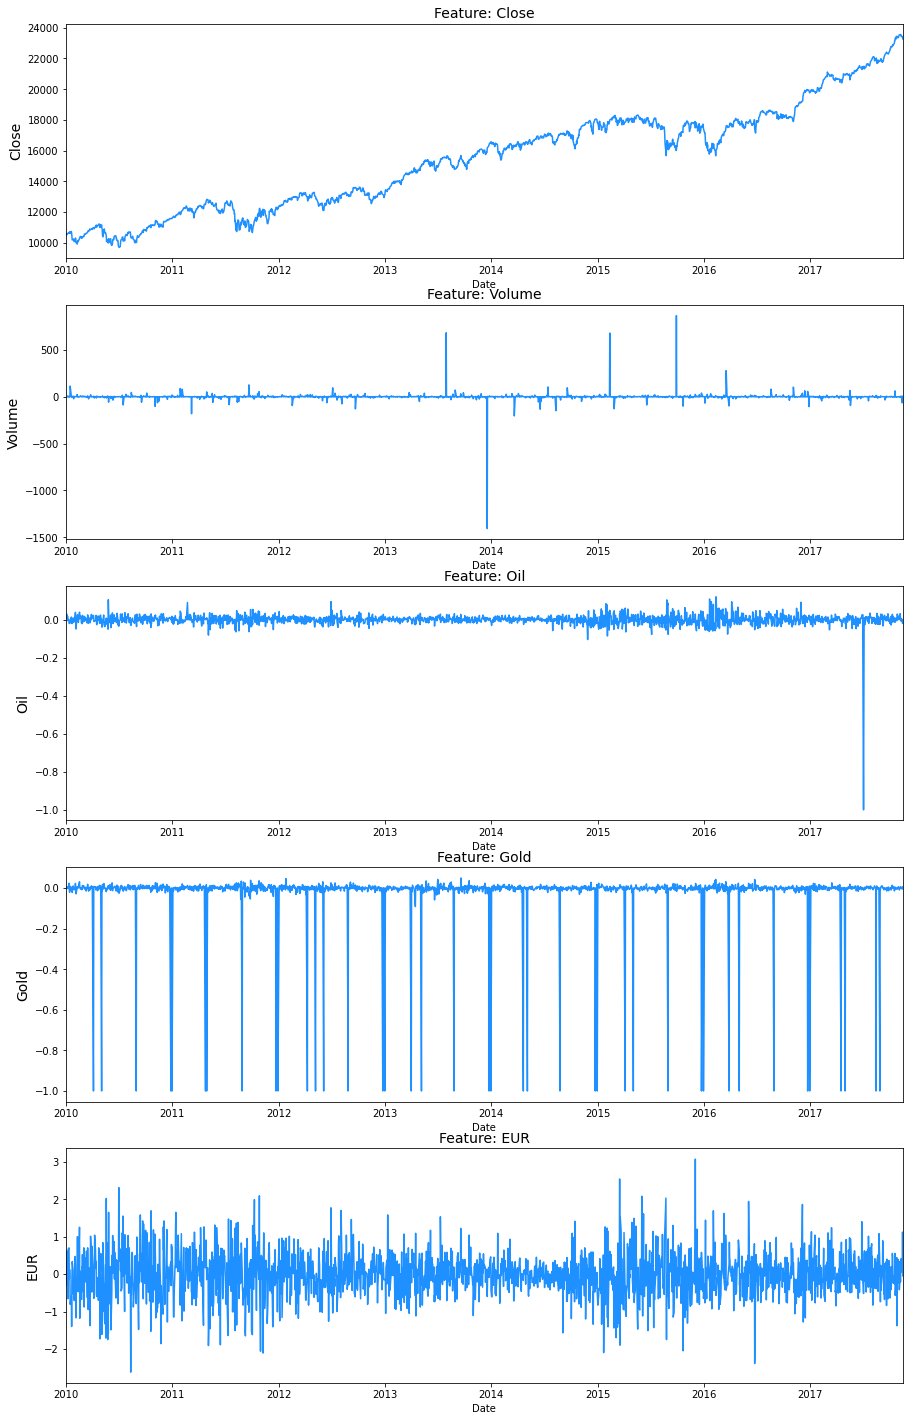

In [29]:
# To compelte the data, as naive method, we will use ffill
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 25))

for i, column in enumerate(df[['Close', 'Volume', 'Oil', 'Gold', 'EUR']].columns):
    sns.lineplot(x=df['Date'], y=df[column].fillna(method='ffill'), ax=ax[i], color='dodgerblue')
    ax[i].set_title('Feature: {}'.format(column), fontsize=14)
    ax[i].set_ylabel(ylabel=column, fontsize=14)
                      
    ax[i].set_xlim([date(2009, 12, 31), date(2017, 11, 15)])       

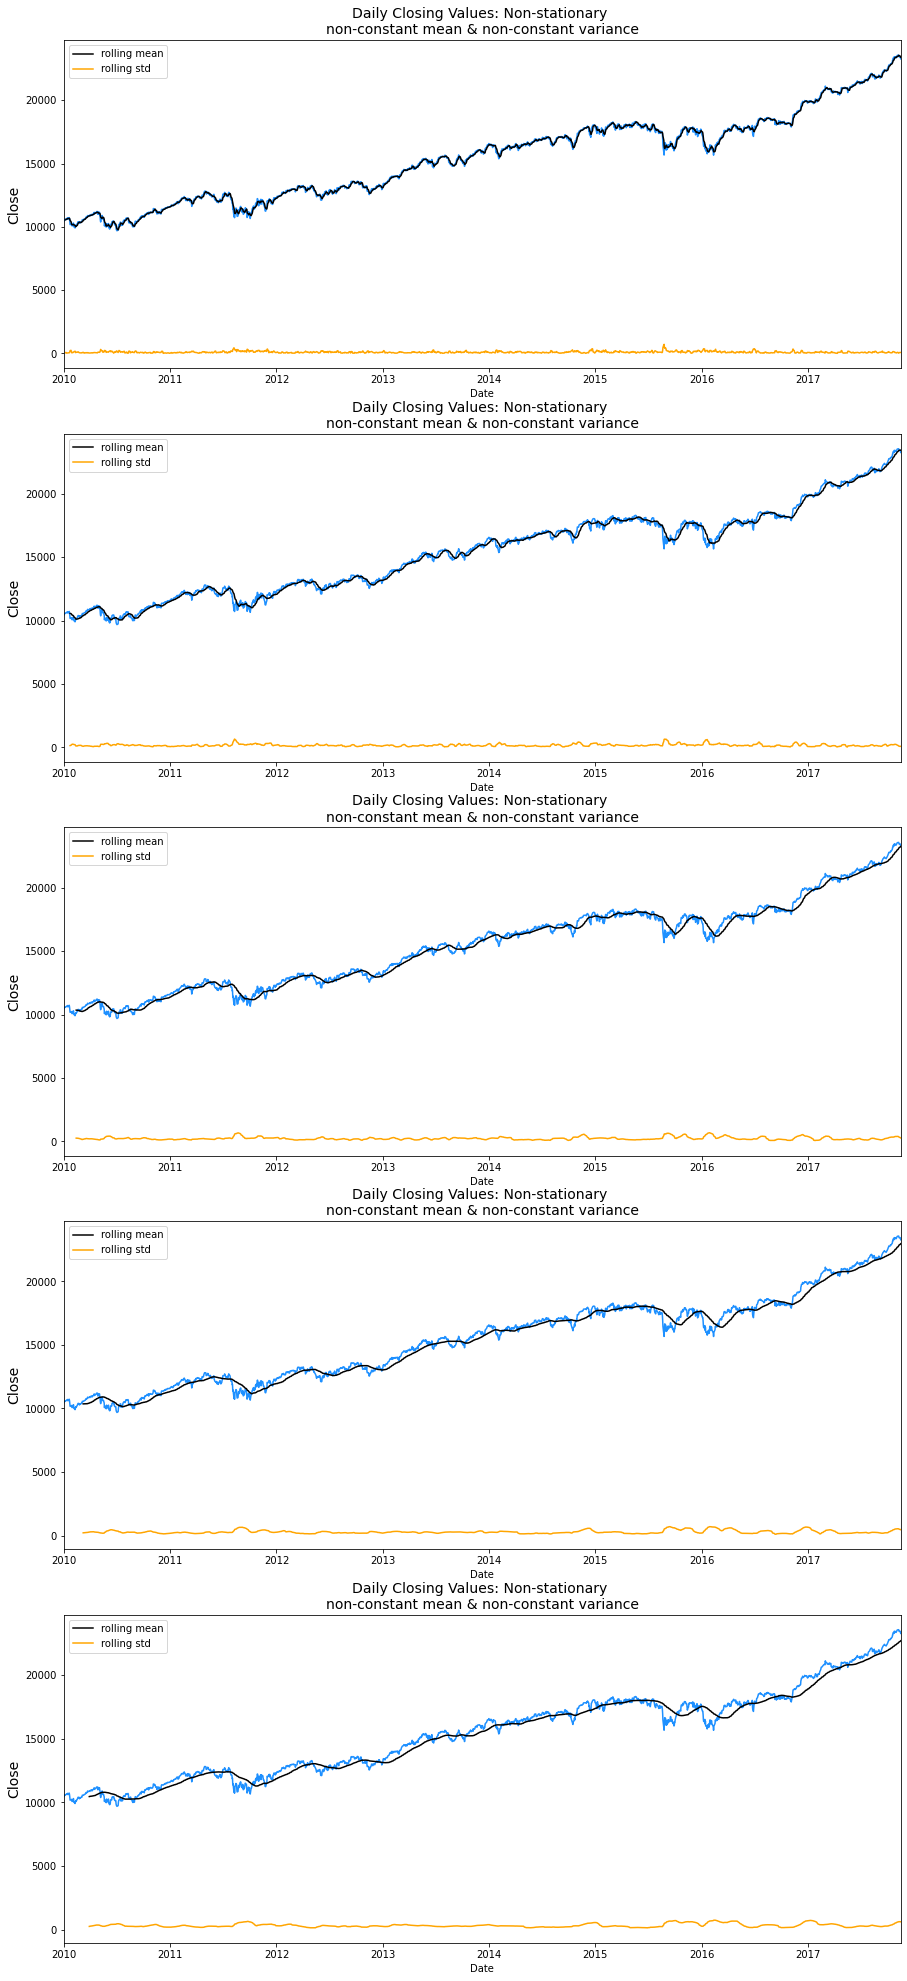

In [25]:
# Moving Averages on Closing Values
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 35))

for i, rolling_window in enumerate([3, 15, 30, 45, 60]):
  sns.lineplot(x=df['Date'], y=df['Close'], ax=ax[i], color='dodgerblue')
  sns.lineplot(x=df['Date'], y=df['Close'].rolling(rolling_window).mean(), ax=ax[i], color='black', label='rolling mean')
  sns.lineplot(x=df['Date'], y=df['Close'].rolling(rolling_window).std(), ax=ax[i], color='orange', label='rolling std')
  ax[i].set_title('Daily Closing Values: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
  ax[i].set_ylabel(ylabel='Close', fontsize=14)
  ax[i].set_xlim([date(2009, 12, 31), date(2017, 11, 15)])    

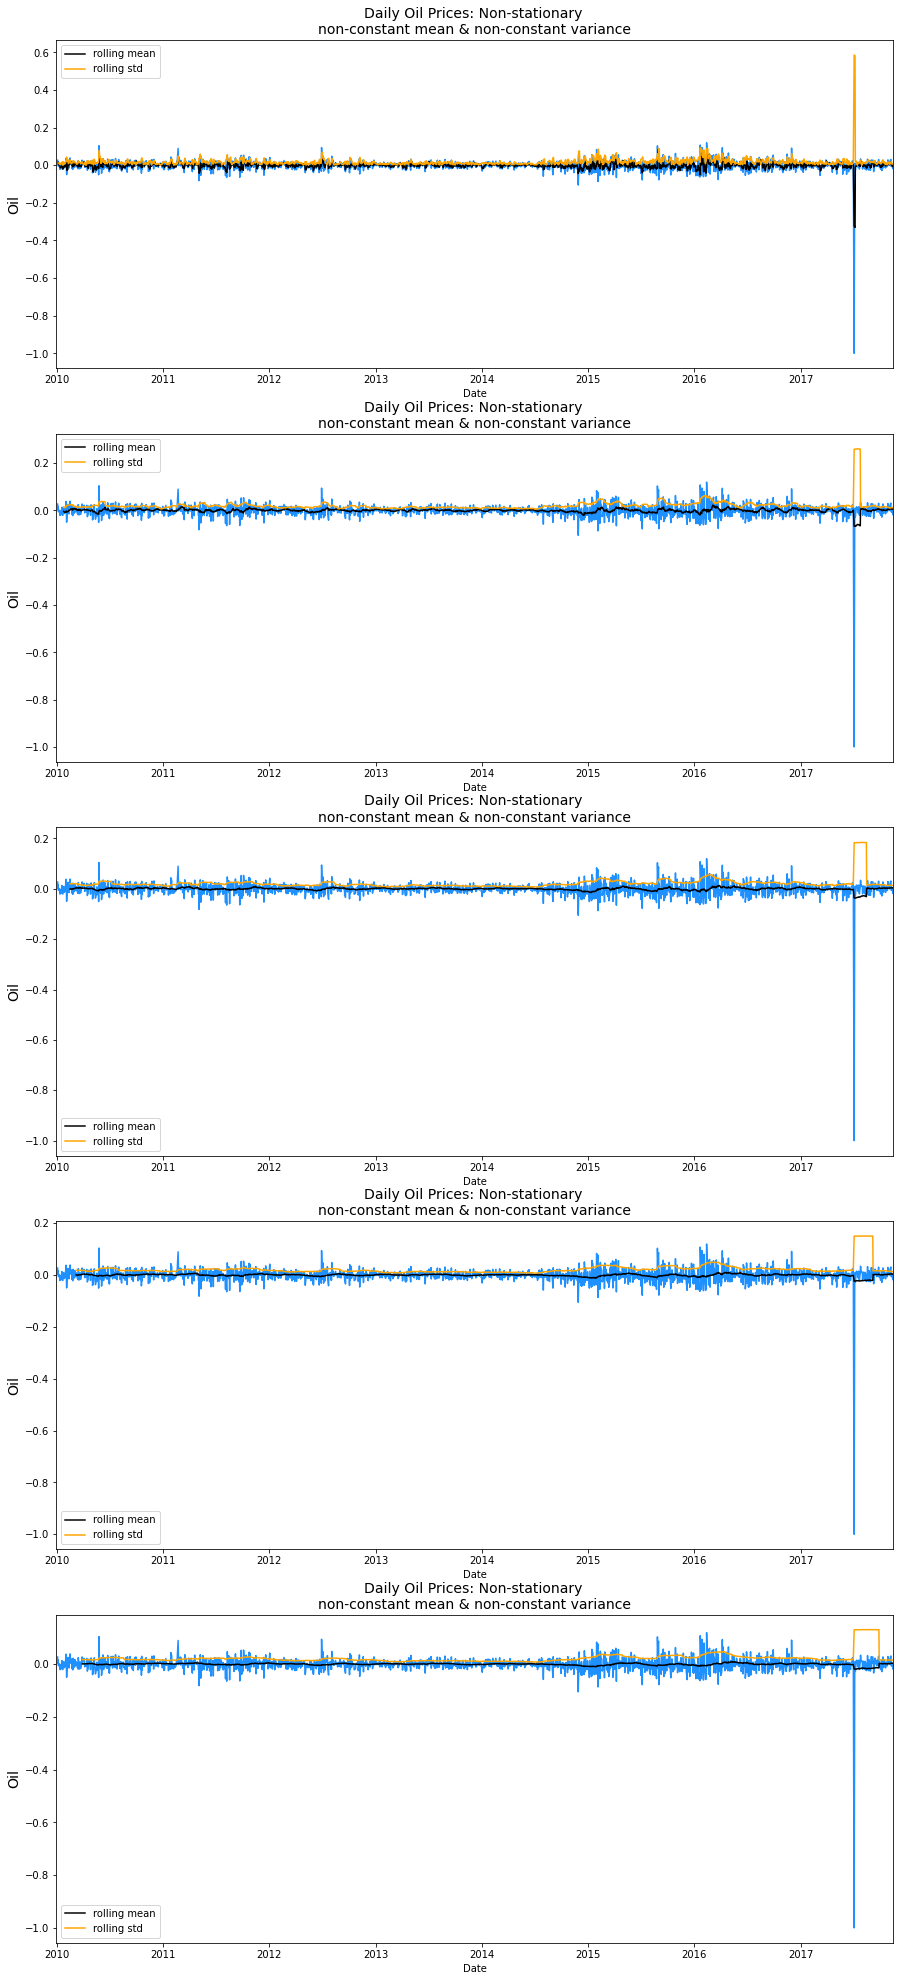

In [27]:
# Moving Averages on Closing Values
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 35))

for i, rolling_window in enumerate([3, 15, 30, 45, 60]):
  sns.lineplot(x=df['Date'], y=df['Oil'], ax=ax[i], color='dodgerblue')
  sns.lineplot(x=df['Date'], y=df['Oil'].rolling(rolling_window).mean(), ax=ax[i], color='black', label='rolling mean')
  sns.lineplot(x=df['Date'], y=df['Oil'].rolling(rolling_window).std(), ax=ax[i], color='orange', label='rolling std')
  ax[i].set_title('Daily Oil Prices: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
  ax[i].set_ylabel(ylabel='Oil', fontsize=14)
  ax[i].set_xlim([date(2009, 12, 31), date(2017, 11, 15)]) 

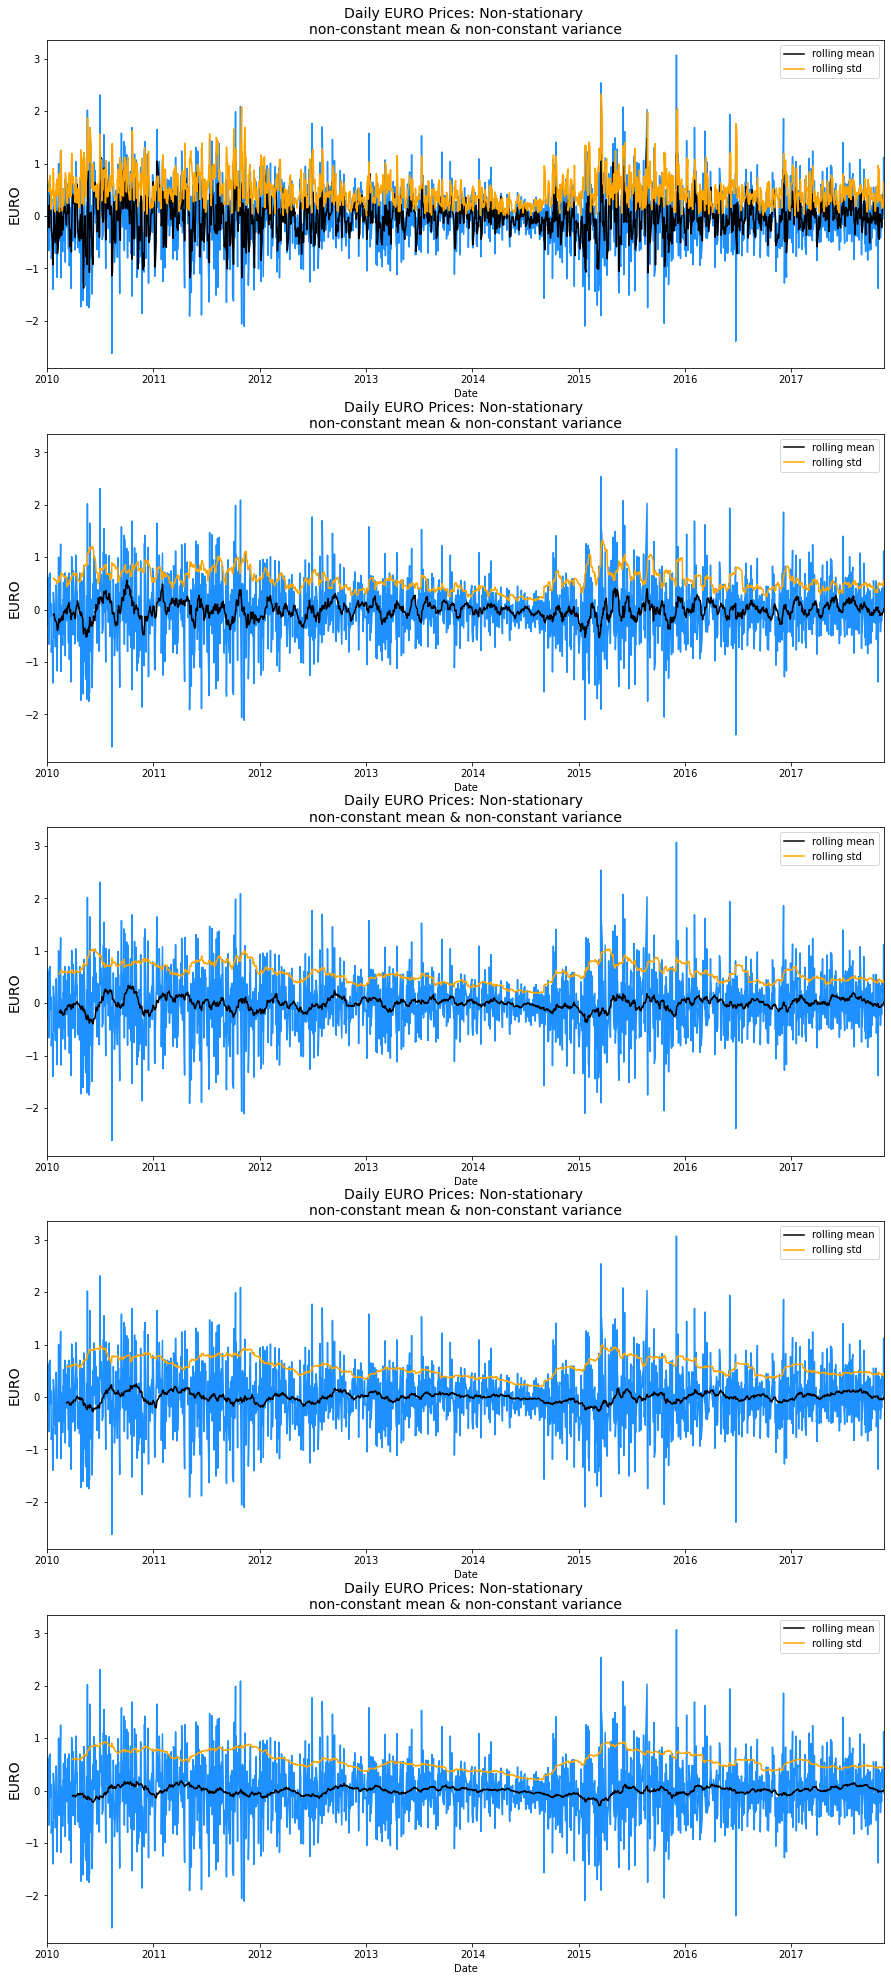

In [28]:
# Moving Averages on Closing Values
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 35))

for i, rolling_window in enumerate([3, 15, 30, 45, 60]):
  sns.lineplot(x=df['Date'], y=df['EUR'], ax=ax[i], color='dodgerblue')
  sns.lineplot(x=df['Date'], y=df['EUR'].rolling(rolling_window).mean(), ax=ax[i], color='black', label='rolling mean')
  sns.lineplot(x=df['Date'], y=df['EUR'].rolling(rolling_window).std(), ax=ax[i], color='orange', label='rolling std')
  ax[i].set_title('Daily EURO Prices: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
  ax[i].set_ylabel(ylabel='EURO', fontsize=14)
  ax[i].set_xlim([date(2009, 12, 31), date(2017, 11, 15)]) 

Unit Root Test Using Augmented Dickey-Fuller to check Non-Stationarity. ALthough clearly visible graphs the data is non-stationary

In [30]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Close'].values)
result

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(0.4684478135958925,
 0.9838818768055808,
 5,
 1978,
 {'1%': -3.4336603168110695,
  '10%': -2.5675484732666,
  '5%': -2.8630023108088545},
 24399.544651118325)

In [39]:
def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']
    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'orange'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'red'
    else:
        linecolor = 'purple'
    sns.lineplot(x=df['Date'], y=series, ax=ax, color=linecolor)
    ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    ax.set_ylabel(ylabel=title, fontsize=14)

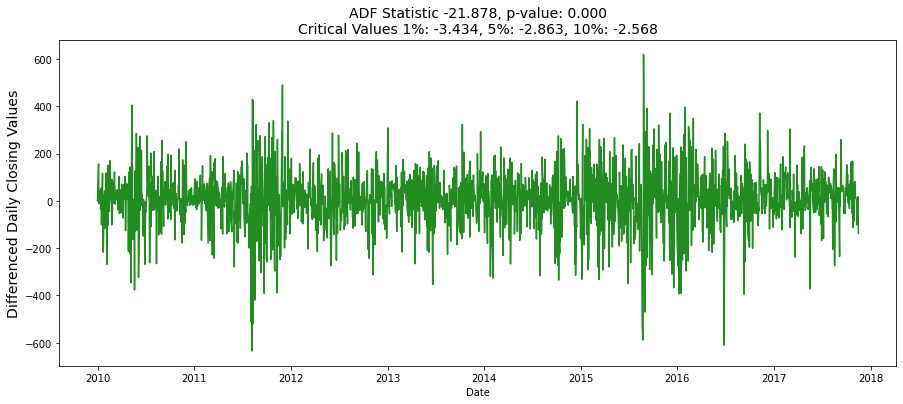

In [44]:
# First Order Differencing for Closing Values ie. Adjusted Close values is more stationary
# This Difference is more suitable for ARIMA type models
ts_diff = np.diff(df['Close'])
diff_Close = np.append([0], ts_diff)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
visualize_adfuller_results(diff_Close, 'Differenced Daily Closing Values', ax)

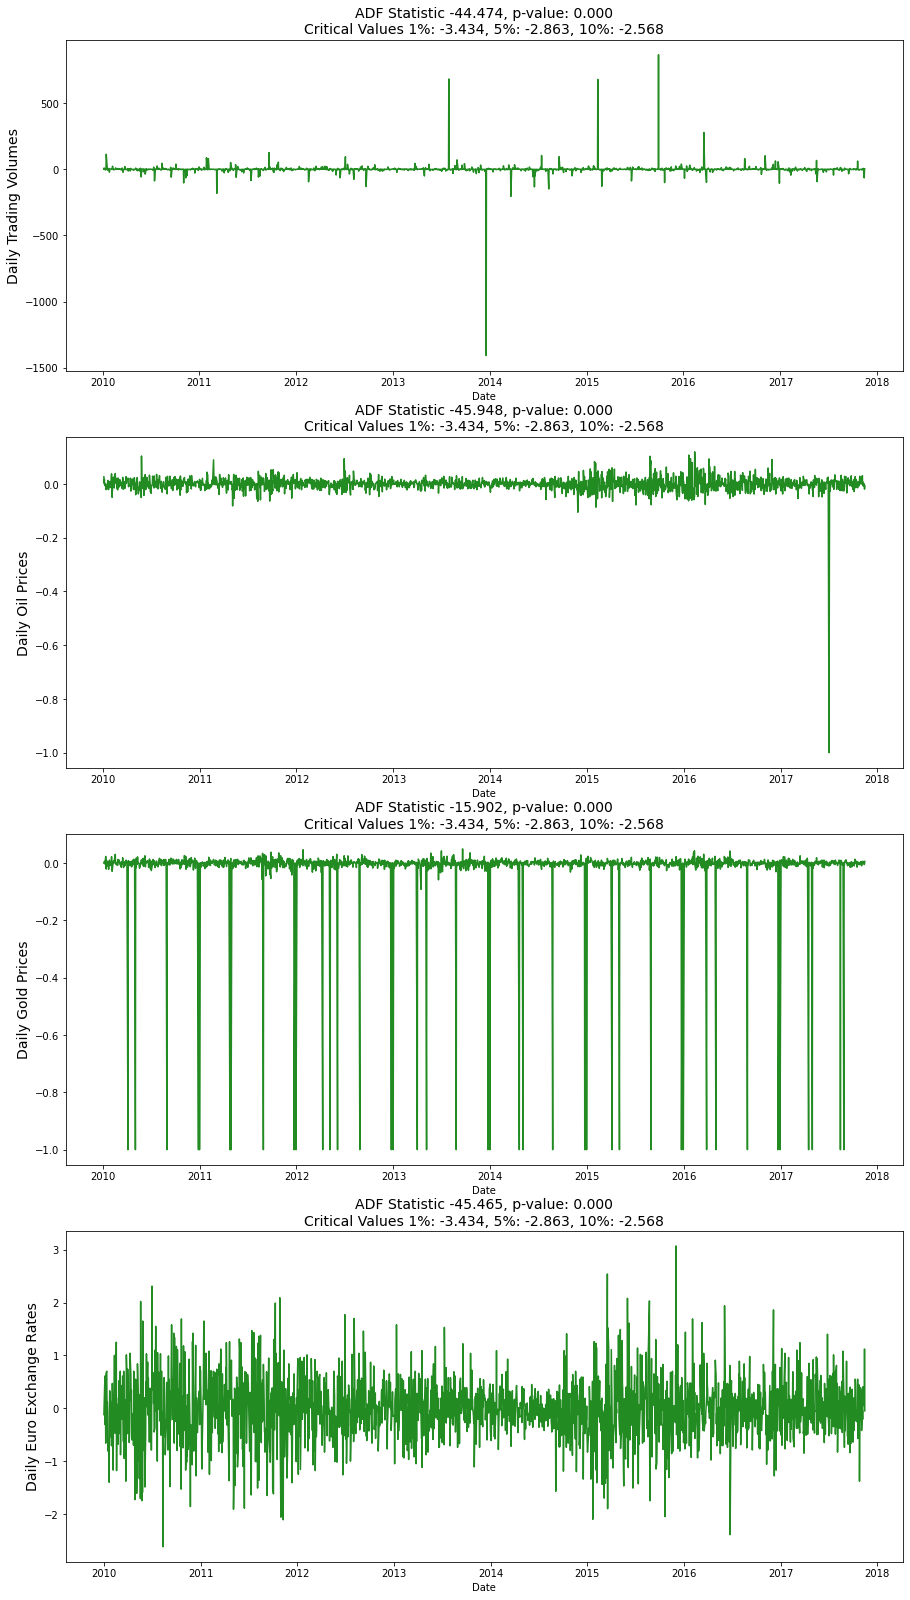

In [62]:
# Checking Stationarity of Volume, Oil, Gold and Euro

f, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 28))

visualize_adfuller_results(df['Volume'].dropna(), 'Daily Trading Volumes', ax[0])
visualize_adfuller_results(df['Oil'].dropna(), 'Daily Oil Prices', ax[1])
visualize_adfuller_results(df['Gold'].dropna(), 'Daily Gold Prices', ax[2])
visualize_adfuller_results(df['EUR'].dropna(), 'Daily Euro Exchange Rates', ax[3])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


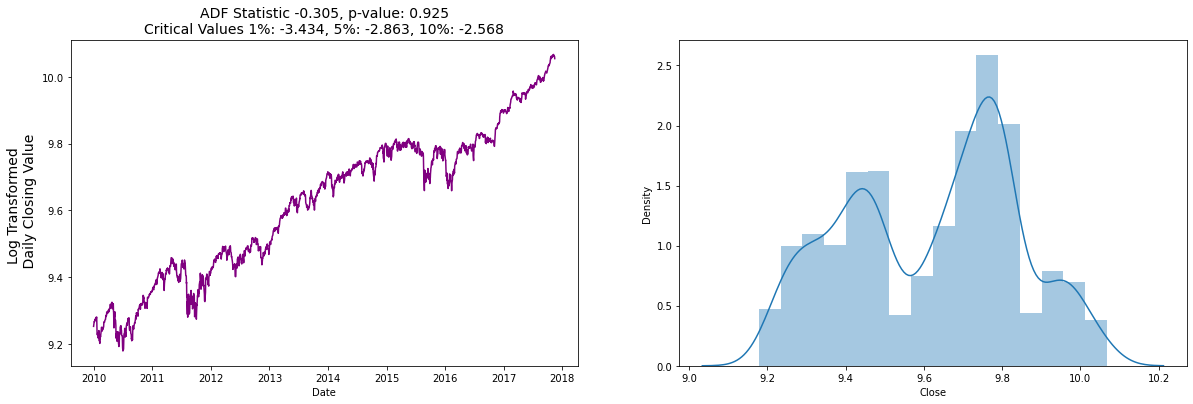

In [65]:
# Log transforming is a common method to smoothen input
# Log transform of negative values will return NaN so abs have been taken
log_Close = np.log(abs(df['Close']))

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
visualize_adfuller_results(log_Close, 'Log Transformed \n Daily Closing Value', ax[0])

sns.distplot(log_Close, ax=ax[1])

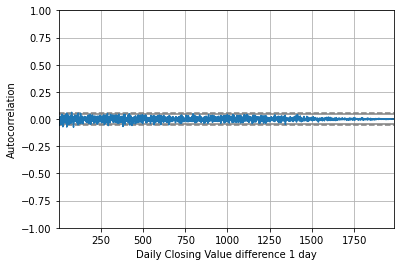

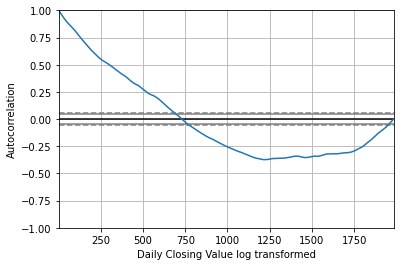

In [68]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(diff_Close)
plt.xlabel('Daily Closing Value difference 1 day')
plt.show()

autocorrelation_plot(log_Close)
plt.xlabel('Daily Closing Value log transformed')
plt.show()

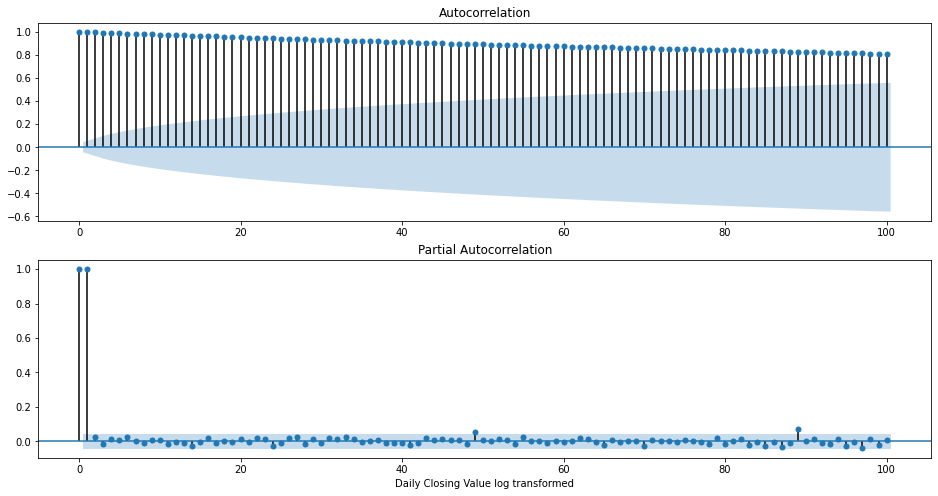

In [99]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

plot_acf(log_Close, lags=100, ax=ax[0])
plot_pacf(log_Close, lags=100, ax=ax[1])
plt.xlabel('Daily Closing Value log transformed')
plt.show()